# Restaurant Success Analytics: Decoding Yelp Ratings with Machine Learning

**Author:** Francisco Barbosa  
**GitHub:** [@Tuminha](https://github.com/Tuminha)  
**Email:** cisco@periospot.com  
**Twitter:** [@cisco_research](https://twitter.com/cisco_research)

---

## 🍽️ Project Overview

The restaurant industry is more competitive than ever, with online reviews becoming the make-or-break factor for new establishments. As someone passionate about data science and the culinary world, I'm embarking on a mission to decode the secret ingredients of restaurant success on Yelp.

**The Big Question:** *If I were to open my dream restaurant tomorrow, what factors should I prioritize to achieve the highest Yelp rating?*

## 🎯 What I'm Building

Using real Yelp data and multiple linear regression, I'll uncover the key drivers behind restaurant ratings. This isn't just an academic exercise—it's a practical guide for anyone looking to understand what makes restaurants thrive in the digital age.

**My Approach:**
- 📊 **Data Exploration**: Deep dive into Yelp's comprehensive dataset
- 🧹 **Data Preparation**: Clean and engineer features for optimal model performance  
- 🤖 **Model Development**: Build and tune a multiple linear regression model
- 💡 **Insight Generation**: Extract actionable recommendations for restaurant success

## 📁 Dataset Overview

I'm working with six rich datasets from Yelp, each offering unique insights into restaurant performance:

* **`yelp_business.json`**: Core establishment data (location, attributes, categories)
* **`yelp_review.json`**: Review metadata and sentiment indicators
* **`yelp_user.json`**: User engagement and profile characteristics
* **`yelp_checkin.json`**: Customer visit patterns and timing data
* **`yelp_tip.json`**: Quick feedback and tip engagement metrics
* **`yelp_photo.json`**: Visual content and photo engagement data

## 🚀 Project Goals

By the end of this analysis, I'll be able to answer:
- Which restaurant attributes have the strongest correlation with high ratings?
- How important are factors like location, cuisine type, and price range?
- What role does customer engagement (photos, tips, check-ins) play in ratings?
- Can I build a reliable model to predict restaurant success?

Let's dive into the data and start uncovering the patterns that separate 5-star establishments from the rest!

## Load the Data and Take a Peek

To get a better understanding of the dataset we can use Pandas to explore the data in DataFrame form. In the code block below we have imported Pandas for you. The `read_json()` method reads data from a json file into a DataFrame, as shown below:
```python
df = pd.read_json('file_name.json', lines=True)
```
Load the data from each of the json files with the following naming conventions:
* `yelp_business.json` into a DataFrame named `businesses`
* `yelp_review.json` into a DataFrame named `reviews`
* `yelp_user.json` into a DataFrame named `users`
* `yelp_checkin.json` into a DataFrame named `checkins`
* `yelp_tip.json` into a DataFrame named `tips`
* `yelp_photo.json` into a DataFrame named `photos`

Importing that data could take 10 to 20 seconds to run depending on your computer, but don't worry, once it's loaded in you're ready to go!

In [ ]:
import pandas as pd

pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500


df = pd.read_json('yelp_business.json', lines=True)



,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,1,33.449999,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping, Local Services, Automotive, Electronics Repair",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0'}",1,51.035591,-114.027366,Action Engine,,T2H 0N5,0,4,2.0,AB,0,1


In order to more clearly see the information in our DataFrame, we can adjust the number of columns shown (`max_columns`) and the number of characters shown in a column (`max_colwidth`) with the below code:

```python
pd.options.display.max_columns = number_of_columns_to_display
pd.options.display.max_colwidth = number_of_characters_to_display
```

Set `max_columns` to `60` and `max_colwidth` to `500`. We are working with some BIG data here!

In [11]:
max_columns = 60
max_colwidth = 500

pd.options.display.max_columns = max_columns
pd.options.display.max_colwidth = max_colwidth



Inspect the first five rows of each DataFrame using the `.head()` method to get an overview of the data (make sure to check each DataFrame in a separate cell in order to view it properly).

In [12]:
df.head()


,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,1,33.449999,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping, Local Services, Automotive, Electronics Repair",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0'}",1,51.035591,-114.027366,Action Engine,,T2H 0N5,0,4,2.0,AB,0,1


Explore each dataset using methods like `.head()`, `.columns`, `.info()`, and `.describe()` to get a better sense of the data.


In [14]:
df.columns
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   address             188593 non-null  object 
 1   alcohol?            188593 non-null  int64  
 2   attributes          162807 non-null  object 
 3   business_id         188593 non-null  object 
 4   categories          188052 non-null  object 
 5   city                188593 non-null  object 
 6   good_for_kids       188593 non-null  int64  
 7   has_bike_parking    188593 non-null  int64  
 8   has_wifi            188593 non-null  int64  
 9   hours               143791 non-null  object 
 10  is_open             188593 non-null  int64  
 11  latitude            188587 non-null  float64
 12  longitude           188587 non-null  float64
 13  name                188593 non-null  object 
 14  neighborhood        188593 non-null  object 
 15  postal_code         188593 non-nul

,alcohol?,good_for_kids,has_bike_parking,has_wifi,is_open,latitude,longitude,price_range,review_count,stars,take_reservations,takes_credit_cards
count,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000,188587.000000,188587.000000,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000
mean,0.140610,0.279029,0.350692,0.134968,0.830391,38.506793,-97.490873,1.035855,31.797310,3.631550,0.106086,0.700243
std,0.347619,0.448523,0.477188,0.341690,0.375290,5.122684,17.693360,1.037985,104.124212,1.016783,0.307948,0.458152
min,0.000000,0.000000,0.000000,0.000000,0.000000,-71.753941,-180.000000,0.000000,3.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,33.630878,-112.279276,0.000000,4.000000,3.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,36.143595,-111.777460,1.000000,9.000000,3.500000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,43.593106,-79.982958,2.000000,24.000000,4.500000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,85.051129,115.086769,4.000000,7968.000000,5.000000,1.000000,1.000000


How many different businesses are in the dataset?

In [16]:
df.shape

print("There are", df.shape[0], "different businesses in the dataset.")

There are 188593 different businesses in the dataset.


What are the different features in the review DataFrame?

In [17]:
# Calculate the number of features in the review DataFrame
num_features = len(df.columns)
print("The review DataFrame has", num_features, "features.")

# Calculate the number of features in the user DataFrame
num_features = len(df.columns)
print("The user DataFrame has", num_features, "features.")

The review DataFrame has 22 features.
The user DataFrame has 22 features.


What feature, or column, do the DataFrames have in common?


In [19]:
import pandas as pd
import json

# Load the datasets
business_df = pd.read_json('yelp_business.json', lines=True)
review_df = pd.read_json('yelp_review.json', lines=True)
user_df = pd.read_json('yelp_user.json', lines=True)
checkin_df = pd.read_json('yelp_checkin.json', lines=True)
tip_df = pd.read_json('yelp_tip.json', lines=True)
photo_df = pd.read_json('yelp_photo.json', lines=True)

print("Datasets loaded successfully!")
print(f"Business data shape: {business_df.shape}")
print(f"Review data shape: {review_df.shape}")
print(f"User data shape: {user_df.shape}")
print(f"Checkin data shape: {checkin_df.shape}")
print(f"Tip data shape: {tip_df.shape}")
print(f"Photo data shape: {photo_df.shape}")

def find_common_features(df1, df2, df3, df4, df5, df6):
    """
    Find common features between two DataFrames
    
    Args:
        df1 (pd.DataFrame): First DataFrame
        df2 (pd.DataFrame): Second DataFrame
        df3 (pd.DataFrame): Third DataFrame
        df4 (pd.DataFrame): Fourth DataFrame
        df5 (pd.DataFrame): Fifth DataFrame
        df6 (pd.DataFrame): Sixth DataFrame

    Returns:
        list: List of common features
    """
    common_features = set(df1.columns) & set(df2.columns) & set(df3.columns) & set(df4.columns) & set(df5.columns) & set(df6.columns)
    return list(common_features)

common_features = find_common_features(business_df, review_df, user_df, checkin_df, tip_df, photo_df)
print("Common features between all DataFrames:", common_features)





        

Datasets loaded successfully!
Business data shape: (188593, 22)
Review data shape: (188593, 7)
User data shape: (188593, 6)
Checkin data shape: (157075, 4)
Tip data shape: (121526, 3)
Photo data shape: (32976, 3)
Common features between all DataFrames: ['business_id']


What is the Yelp rating, or `stars`, of the establishment with `business_id` = `5EvUIR4IzCWUOm0PsUZXjA`. Use Pandas boolean indexing to find the Yelp rating, using the syntax below:

```python
df[df['column_we_know'] == 'value_we_know']['column_we_want']
```

In [23]:
df[df['business_id'] == '5EvUIR4IzCWUOm0PsUZXjA']['stars'].iloc[0]

stars = df[df['business_id'] == '5EvUIR4IzCWUOm0PsUZXjA']['stars'].iloc[0]

print("The business with the business_id 5EvUIR4IzCWUOm0PsUZXjA has a Yelp rating of", stars)


The business with the business_id 5EvUIR4IzCWUOm0PsUZXjA has a Yelp rating of 3.0


 What feature, or column, do the DataFrames have in common?

In [24]:
common_features = find_common_features(business_df, review_df, user_df, checkin_df, tip_df, photo_df)
print("Common features between all DataFrames:", common_features)

Common features between all DataFrames: ['business_id']


## Merge the Data

Since we are working with data from several files, we need to combine the data into a single DataFrame that allows us to analyze the different features with respect to our target variable, the Yelp rating. We can do this by merging the multiple DataFrames we have together, joining them on the columns they have in common. In our case, this unique identifying column is the `business_id`. We can merge two DataFrames together with the following syntax:

```python
pd.merge(left, right, how='inner/outer/left/right', on='column(s)_to_merge_on')
```
* `left` is the DataFrame on the left side of our merge
* `right` is the DataFrame on the right side of our merge
* `how` describes the style of merge we want to complete (similar to inner/outer/left/right joins in SQL)
* `on` is the column or columns to perform the merge on (the column connecting the two tables)

Given our six DataFrames, we will need to perform 5 merges to combine all the data into one DataFrame. In the cell below we merged the business table and the review table into a new DataFrame, `df`, for you. After the merge we've added all the rows from `businesses` and `reviews` together, but kept the same total number of rows! Run the cell to perform the merge and confirm the number of rows in `df`. 

In [27]:
# Business_id is common to all DataFrames. We need to merge all the dataframes.
# Load the datasets
business_df = pd.read_json('yelp_business.json', lines=True)
review_df = pd.read_json('yelp_review.json', lines=True)
user_df = pd.read_json('yelp_user.json', lines=True)
checkin_df = pd.read_json('yelp_checkin.json', lines=True)
tip_df = pd.read_json('yelp_tip.json', lines=True)
photo_df = pd.read_json('yelp_photo.json', lines=True)


# Start with business data as the foundation
df = business_df.copy()
print(f"Starting with {len(df)} businesses")

# Merge with reviews
df = pd.merge(df, review_df, how='left', on='business_id')
print(f"After merging reviews: {len(df)} rows")

# Merge with users
df = pd.merge(df, user_df, how='left', on='business_id')
print(f"After merging users: {len(df)} rows")

# Merge with checkins
df = pd.merge(df, checkin_df, how='left', on='business_id')
print(f"After merging checkins: {len(df)} rows")

# Merge with tips
df = pd.merge(df, tip_df, how='left', on='business_id')
print(f"After merging tips: {len(df)} rows")

# Merge with photos
df = pd.merge(df, photo_df, how='left', on='business_id')
print(f"After merging photos: {len(df)} rows")

Starting with 188593 businesses
After merging reviews: 188593 rows
After merging users: 188593 rows
After merging checkins: 188593 rows
After merging tips: 188593 rows
After merging photos: 188593 rows


In [ ]:
# Check the final merged dataset
print(f"Final dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")


Final dataset shape: (188593, 40)
Columns: ['address', 'alcohol?', 'attributes', 'business_id', 'categories', 'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'neighborhood', 'postal_code', 'price_range', 'review_count', 'stars', 'state', 'take_reservations', 'takes_credit_cards', 'average_review_age', 'average_review_length', 'average_review_sentiment', 'number_funny_votes', 'number_cool_votes', 'number_useful_votes', 'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 'time', 'weekday_checkins', 'weekend_checkins', 'average_tip_length', 'number_tips', 'average_caption_length', 'number_pics']


Merge each of the other 4 DataFrames into our new DataFrame `df` to combine all the data together. Make sure that `df` is the left DataFrame in each merge and `how=left` since not every DataFrame includes every business in the dataset (this way we won't lose any data during the merges). Once combined, print out the columns of `df`. What features are in this new DataFrame?

In [30]:
print(f"The features in the merged DataFrame are: {list(df.columns)}")


The features in the merged DataFrame are: ['address', 'alcohol?', 'attributes', 'business_id', 'categories', 'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'neighborhood', 'postal_code', 'price_range', 'review_count', 'stars', 'state', 'take_reservations', 'takes_credit_cards', 'average_review_age', 'average_review_length', 'average_review_sentiment', 'number_funny_votes', 'number_cool_votes', 'number_useful_votes', 'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 'time', 'weekday_checkins', 'weekend_checkins', 'average_tip_length', 'number_tips', 'average_caption_length', 'number_pics']


## Clean the Data

We are getting really close to the fun analysis part! We just have to clean our data a bit so we can focus on the features that might have predictive power for determining an establishment's Yelp rating.

In a Linear Regression model, our features will ideally be continuous variables that have an affect on our dependent variable, the Yelp rating. For this project with will also be working with some features that are binary, on the scale [0,1]. With this information, we can remove any columns in the dataset that are not continuous or binary, and that we do not want to make predictions on. The cell below contains a list of these unnecessary features. Drop them from `df` with Pandas' drop syntax, provided below:

```python
df.drop(list_of_features_to_remove, axis=1, inplace=True)
```

* `list_of_features_to_remove` is, you guessed it, the list of features we want to remove!
* `axis=1` lets Pandas know we want to drop columns, not rows, from our DataFrame (axis=0 is used for computations along rows!) 
* `inplace=True` lets us drop the columns right here in our DataFrame, instead of returning a new DataFrame that we could store in a new variable

In [ ]:
features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time']


Now we just have to check our data to make sure we don't have any missing values, or `NaN`s, which will prevent the Linear Regression model from running correctly. To do this we can use the statement `df.isna().any()`. This will check all of our columns and return `True` if there are any missing values or `NaN`s, or `False` if there are no missing values. Check if `df` is missing any values.

In [33]:
df.isna().any()
# Check for missing values in each column
missing_values = df.isna().sum()

# Print columns with missing values
print("Columns with missing values:")
for column, count in missing_values.items():
    if count > 0:
        print(f"{column}: {count} missing values")
    else:
        print(f"{column}: No missing values")

columns_with_missing_values = missing_values[missing_values > 0]
print("Columns with missing values:")
for column, count in columns_with_missing_values.items():
    print(f"{column}: {count} missing values")



Columns with missing values:
address: No missing values
alcohol?: No missing values
attributes: 25786 missing values
business_id: No missing values
categories: 541 missing values
city: No missing values
good_for_kids: No missing values
has_bike_parking: No missing values
has_wifi: No missing values
hours: 44802 missing values
is_open: No missing values
latitude: 6 missing values
longitude: 6 missing values
name: No missing values
neighborhood: No missing values
postal_code: No missing values
price_range: No missing values
review_count: No missing values
stars: No missing values
state: No missing values
take_reservations: No missing values
takes_credit_cards: No missing values
average_review_age: No missing values
average_review_length: No missing values
average_review_sentiment: No missing values
number_funny_votes: No missing values
number_cool_votes: No missing values
number_useful_votes: No missing values
average_number_friends: No missing values
average_days_on_yelp: No missing val

As you can see, there are a few columns with missing values. Since our dataset has no information recorded for some businesses in these columns, we will assume the Yelp pages did not display these features. For example, if there is a `NaN` value for `number_pics`, it means that the associated business did not have any pictures posted on its Yelp page. Thus we can replace all of our `NaN`s with `0`s. To do this we can use the `.fillna()` method, which takes a dictionary as shown below:

```python
df.fillna({'column_1':val_to_replace_na,
           'column_2':val_to_replace_na,
           'column_3':val_to_replace_na},
          inplace=True)
```

* `column_1`, `column_2`, and `column_3` are the columns with missing values that we want to fill. We can include as many columns as we like in the dictionary that is passed to `.fill_na()`
* `val_to_replace_na` is the value that will replace the missing values, or `NaN`s
* `inplace=True` since we want to perform our changes in place and not return a new DataFrame

Fill the missing values in `df` with `0`. Afterwards, confirm the missing values have been filled with `df.isna().any()`.

In [36]:
# Fill missing values with 0 using the fillna method with a dictionary
fill_dict = {column: 0 for column in columns_with_missing_values.index}
df.fillna(fill_dict, inplace=True)

df.isna().any()

# Check if there are any columns with missing values
if df.isna().any().any() == True:
    print("There are missing values in the DataFrame. This values are: ")
else:
    print("There are no missing values in the DataFrame.")


There are no missing values in the DataFrame.


Identify features that aren’t numeric or binary (e.g. timestamps, postal codes, etc.) using the .dtypes attribute or previewing the columns using .head().



In [38]:
df.dtypes

df.head()

for column in df.columns:
    if df[column].dtype not in ['int64', 'float64', 'bool']:
        print(column)

print("The columns that are not numeric or binary are: ", column)







address
attributes
business_id
categories
city
hours
name
neighborhood
postal_code
state
time
The columns that are not numeric or binary are:  number_pics


Remove irrelevant columns from the DataFrame using pandas .drop() method.

In [39]:
# Removing irrelevant columns
df = df.drop(columns=['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time'])

df.head()




,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
0,0,1,0,0,2,24,4.0,1,1,618.250000,532.916667,0.865342,6,5,13,42.833333,1809.375000,5.375000,114.875000,1.125000,11.0,18.0,38.0,6.0,0.0,0.0
1,0,1,0,0,2,3,4.5,0,1,371.666667,481.333333,0.975000,0,1,1,64.333333,970.333333,2.666667,19.666667,0.666667,0.0,1.0,66.0,1.0,29.0,1.0
2,1,1,1,1,2,5,4.0,1,0,1106.200000,252.000000,0.301240,0,2,1,4.200000,1499.600000,1.000000,24.600000,0.600000,2.0,5.0,32.0,1.0,0.0,0.0
3,0,0,0,0,0,8,1.5,0,0,398.500000,672.625000,-0.060500,1,0,3,12.500000,1626.500000,2.375000,68.000000,0.250000,1.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,4,2.0,0,1,1412.750000,1015.500000,0.372550,0,0,4,137.750000,2570.000000,26.750000,528.250000,4.250000,2.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# List of columns to remove
features_to_remove = [
    'business_id', 'address', 'attributes', 'categories', 'city', 
    'hours', 'is_open', 'latitude', 'longitude', 'name', 
    'neighborhood', 'postal_code', 'state', 'time'
]

# Remove the irrelevant columns
df = df.drop(columns=features_to_remove, errors='ignore')

print(f"Dataset shape after removing irrelevant columns: {df.shape}")
print(f"Remaining columns: {list(df.columns)}")

# Check if df is still missing any values and its integrity
df.isna().any()

# Check the data types of the remaining columns
print(df.dtypes)



Dataset shape after removing irrelevant columns: (188593, 26)
Remaining columns: ['alcohol?', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'price_range', 'review_count', 'stars', 'take_reservations', 'takes_credit_cards', 'average_review_age', 'average_review_length', 'average_review_sentiment', 'number_funny_votes', 'number_cool_votes', 'number_useful_votes', 'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 'weekday_checkins', 'weekend_checkins', 'average_tip_length', 'number_tips', 'average_caption_length', 'number_pics']
alcohol?                        int64
good_for_kids                   int64
has_bike_parking                int64
has_wifi                        int64
price_range                     int64
review_count                    int64
stars                         float64
take_reservations               int64
takes_credit_cards              int64
average_review_age            float64
average_

## Exploratory Analysis

Now that our data is all together, let's investigate some of the different features to see what might correlate most with our dependent variable, the Yelp rating (called `stars` in our DataFrame). The features with the best correlations could prove to be the most helpful for our Linear Regression model! Pandas DataFrames have a really helpful method, `.corr()`, that allows us to see the correlation coefficients for each pair of our different features. Remember, a correlation of `0` indicates that two features have no linear relationship, a correlation coefficient of `1` indicates two features have a perfect positive linear relationship, and a correlation coefficient of `-1` indicates two features have a perfect negative linear relationship. Call `.corr()` on `df`. You'll see that `number_funny_votes` has a correlation coefficient of `0.001320` with respect to `stars`, our Yelp rating. This is a very weak correlation. What features best correlate, both positively and negatively, with Yelp rating?

In [41]:
# Cheking the correlation between features for a linear regression
df.corr()

,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
alcohol?,1.000000,0.305284,0.213318,0.345032,0.349004,0.259836,-0.043332,0.601670,0.190738,0.139108,0.037369,0.097188,0.117472,0.188598,0.165775,0.015261,0.129901,0.017794,0.026846,0.099141,0.094398,0.131175,0.098037,0.208856,0.305570,0.252523
good_for_kids,0.305284,1.000000,0.271788,0.258887,0.205513,0.162469,-0.030382,0.318729,0.150360,0.055847,-0.079183,0.073806,0.060658,0.113262,0.083832,0.016557,0.045057,0.024901,0.040692,0.094233,0.068960,0.079808,0.121948,0.156536,0.291413,0.175058
has_bike_parking,0.213318,0.271788,1.000000,0.235138,0.416044,0.155505,0.068084,0.160129,0.286298,-0.080443,-0.116295,0.130448,0.060595,0.114094,0.094000,0.028307,-0.045849,0.018120,0.031203,0.083062,0.082474,0.093579,0.144163,0.147115,0.180468,0.109552
has_wifi,0.345032,0.258887,0.235138,1.000000,0.240796,0.195737,-0.039857,0.312217,0.155098,-0.034258,-0.037712,0.054699,0.082213,0.147320,0.120622,0.015937,0.000448,0.023913,0.044006,0.082863,0.107467,0.126861,0.104742,0.173542,0.258938,0.210583
price_range,0.349004,0.205513,0.416044,0.240796,1.000000,0.148277,-0.052565,0.316105,0.400742,0.189623,0.003850,0.089349,0.073215,0.119422,0.098990,0.087231,0.176133,0.104221,0.122982,0.210487,0.057877,0.081321,0.129212,0.119632,0.170171,0.143570
review_count,0.259836,0.162469,0.155505,0.195737,0.148277,1.000000,0.032413,0.187755,0.119984,0.010070,0.004748,0.076265,0.548164,0.860767,0.746949,0.026206,0.050451,0.000474,-0.002576,0.014712,0.567452,0.699631,0.094133,0.844978,0.224983,0.610889
stars,-0.043332,-0.030382,0.068084,-0.039857,-0.052565,0.032413,1.000000,-0.024486,0.037748,-0.125645,-0.277081,0.782187,0.001320,0.043375,-0.000066,-0.007629,-0.038061,-0.031141,-0.066572,-0.064419,0.004130,0.007863,-0.052899,0.014038,0.000040,0.001727
take_reservations,0.601670,0.318729,0.160129,0.312217,0.316105,0.187755,-0.024486,1.000000,0.127941,0.064098,0.046331,0.086728,0.071131,0.129165,0.115583,-0.025522,0.048850,0.001131,0.010618,0.063990,0.053162,0.076183,0.084098,0.134832,0.282823,0.231242
takes_credit_cards,0.190738,0.150360,0.286298,0.155098,0.400742,0.119984,0.037748,0.127941,1.000000,0.056399,-0.081383,0.084171,0.049945,0.079879,0.077804,0.027924,0.078443,-0.007124,-0.005260,0.009551,0.047402,0.055898,0.119925,0.097700,0.103271,0.073276
average_review_age,0.139108,0.055847,-0.080443,-0.034258,0.189623,0.010070,-0.125645,0.064098,0.056399,1.000000,0.192355,0.003662,0.032199,0.031577,0.028122,0.218990,0.820888,0.243377,0.261623,0.377335,0.030324,0.035531,-0.000525,0.050846,-0.024121,-0.041140


In [43]:
!pip install seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


Let's order the features with stron correlation with "stars"

The feature highest correlated with stars is:  stars
The second highest correlated feature with stars is:  average_review_sentiment
The third highest correlated feature with stars is:  has_bike_parking
The fourth highest correlated feature with stars is:  number_cool_votes
The fifth highest correlated feature with stars is:  takes_credit_cards
The sixth highest correlated feature with stars is:  review_count
The seventh highest correlated feature with stars is:  number_tips
The eighth highest correlated feature with stars is:  weekend_checkins
The ninth highest correlated feature with stars is:  weekday_checkins
The tenth highest correlated feature with stars is:  number_pics


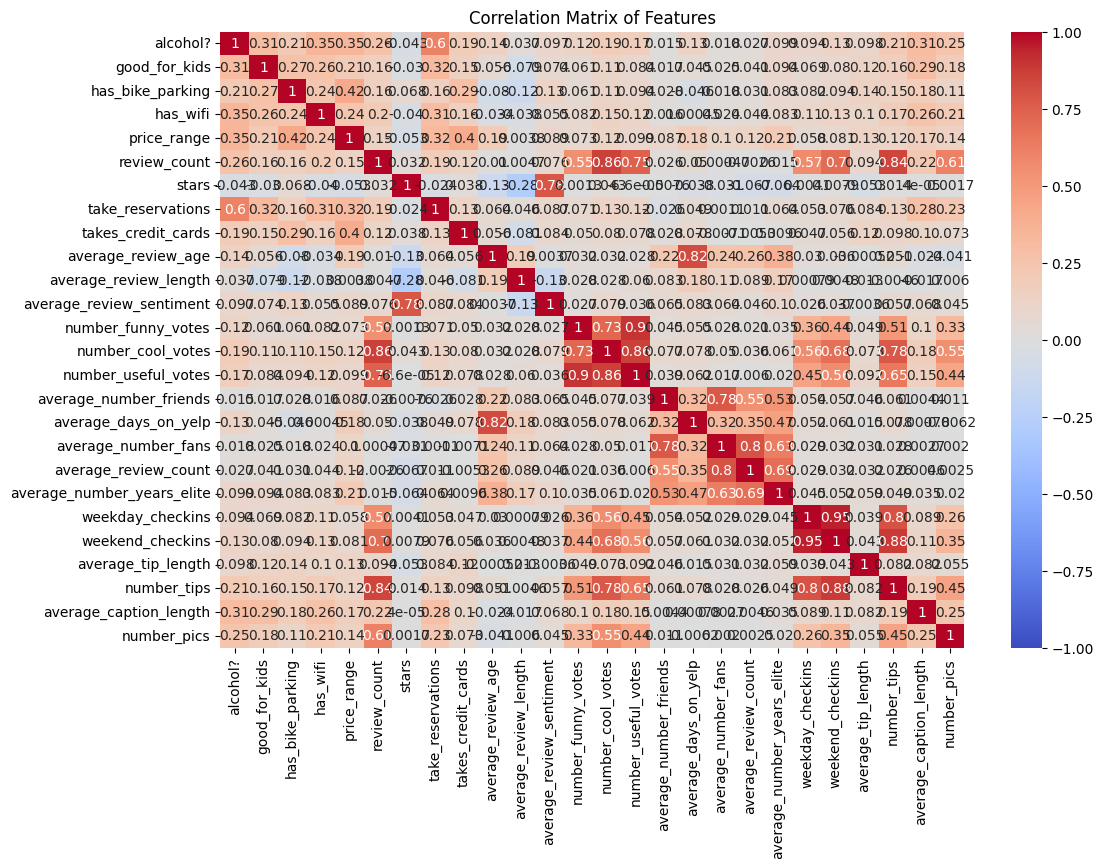

In [46]:
from matplotlib import pyplot as plt
import seaborn as sns

# Ordering the features with strong correlation with "stars"
df.corr()['stars'].sort_values(ascending=False)

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')

print("The feature highest correlated with stars is: ", df.corr()['stars'].sort_values(ascending=False).index[0])
print("The second highest correlated feature with stars is: ", df.corr()['stars'].sort_values(ascending=False).index[1])
print("The third highest correlated feature with stars is: ", df.corr()['stars'].sort_values(ascending=False).index[2])
print("The fourth highest correlated feature with stars is: ", df.corr()['stars'].sort_values(ascending=False).index[3])
print("The fifth highest correlated feature with stars is: ", df.corr()['stars'].sort_values(ascending=False).index[4])
print("The sixth highest correlated feature with stars is: ", df.corr()['stars'].sort_values(ascending=False).index[5])
print("The seventh highest correlated feature with stars is: ", df.corr()['stars'].sort_values(ascending=False).index[6])
print("The eighth highest correlated feature with stars is: ", df.corr()['stars'].sort_values(ascending=False).index[7])
print("The ninth highest correlated feature with stars is: ", df.corr()['stars'].sort_values(ascending=False).index[8])
print("The tenth highest correlated feature with stars is: ", df.corr()['stars'].sort_values(ascending=False).index[9])




To further visualize these relationships, we can plot certain features against our dependent variable, the Yelp rating. In the cell below we have provided the code to import Matplotlib. We can use Matplotlib's `.scatter()` method with the below syntax to plot what these correlations look like:

```python
plt.scatter(x_values_to_plot, y_values_to_plot, alpha=blending_val)
```

* `x_values_to_plot` are the values to be plotted along the x-axis
* `y_values_to_plot` are the values to be plotted along the y-axis
* `alpha=blending_val` is the blending value, or how transparent (0) or opaque (1) a plotted point is. This will help us distinguish areas of the plot with high point densities and low point densities

Plot the three features that correlate most with Yelp rating (`average_review_sentiment`, `average_review_length`, `average_review_age`) against `stars`, our Yelp rating. Then plot a lowly correlating feature, such as `number_funny_votes`, against `stars`.

>What is `average_review_sentiment`, you ask? `average_review_sentiment` is the average sentiment score for all reviews on a business' Yelp page. The sentiment score for a review was calculated using the sentiment analysis tool [VADER](https://github.com/cjhutto/vaderSentiment). VADER uses a labeled set of positive and negative words, along with codified rules of grammar, to estimate how positive or negative a statement is. Scores range from `-1`, most negative, to `+1`, most positive, with a score of `0` indicating a neutral statement. While not perfect, VADER does a good job at guessing the sentiment of text data!

What kind of relationships do you see from the plots? Do you think these variables are good or bad features for our Yelp rating prediction model?

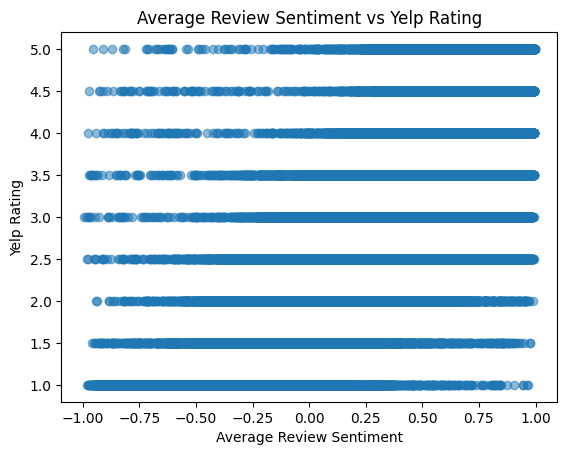

In [47]:
from matplotlib import pyplot as plt

# plot average_review_sentiment against stars here
plt.scatter(df['average_review_sentiment'], df['stars'], alpha=0.5)
plt.xlabel('Average Review Sentiment')
plt.ylabel('Yelp Rating')
plt.title('Average Review Sentiment vs Yelp Rating')
plt.show()



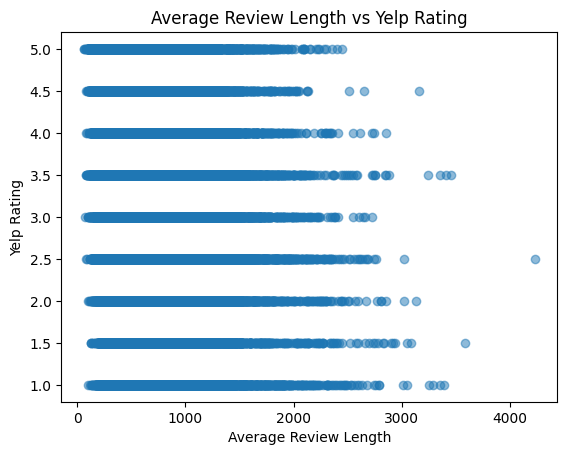

In [48]:
# plot average_review_length against stars here
plt.scatter(df['average_review_length'], df['stars'], alpha=0.5)
plt.xlabel('Average Review Length')
plt.ylabel('Yelp Rating')
plt.title('Average Review Length vs Yelp Rating')
plt.show()


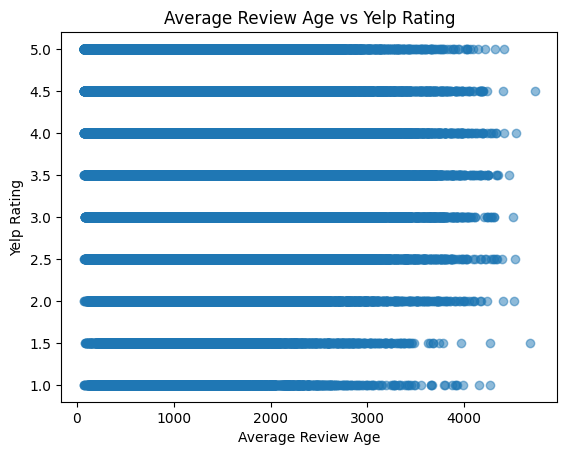

In [49]:
# plot average_review_age against stars here
plt.scatter(df['average_review_age'], df['stars'], alpha=0.5)
plt.xlabel('Average Review Age')
plt.ylabel('Yelp Rating')
plt.title('Average Review Age vs Yelp Rating')
plt.show()



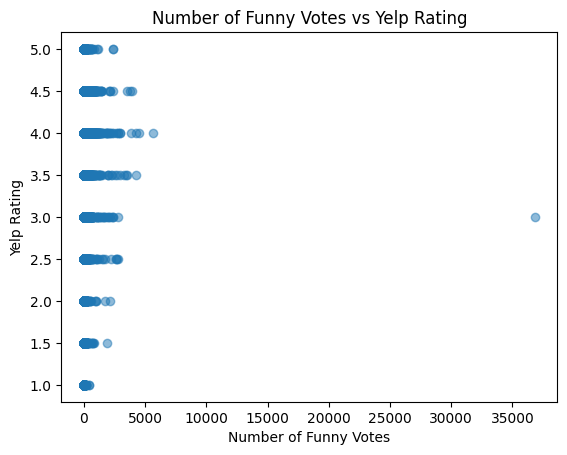

In [50]:
# plot number_funny_votes against stars here
plt.scatter(df['number_funny_votes'], df['stars'], alpha=0.5)
plt.xlabel('Number of Funny Votes')
plt.ylabel('Yelp Rating')
plt.title('Number of Funny Votes vs Yelp Rating')
plt.show()




Why do you think `average_review_sentiment` correlates so well with Yelp rating?

## Data Selection

In order to put our data into a Linear Regression model, we need to separate out our features to model on and the Yelp ratings. From our correlation analysis we saw that the three features with the strongest correlations to Yelp rating are `average_review_sentiment`, `average_review_length`, and `average_review_age`. Since we want to dig a little deeper than `average_review_sentiment`, which understandably has a very high correlation with Yelp rating, let's choose to create our first model with `average_review_length` and `average_review_age` as features.

Pandas lets us select one column of a DataFrame with the following syntax:

```python
subset_of_data = df['feature_to_select']
```
Pandas also lets us select multiple columns from a DataFrame with this syntax:

```python
subset_of_data = df[list_of_features_to_select]
```
Create a new DataFrame `features` that contains the columns we want to model on: `average_review_length` and `average_review_age`. Then create another DataFrame `ratings` that stores the value we want to predict, Yelp rating, or `stars` in `df`.

In [51]:
# Selecting the features to model on
features = df[['average_review_length', 'average_review_age']]

# Creating the ratings DataFrame
ratings = df['stars']



## Split the Data into Training and Testing Sets

We are just about ready to model! But first, we need to break our data into a training set and a test set so we can evaluate how well our model performs. We'll use scikit-learn's `train_test_split` function to do this split, which is provided in the cell below. This function takes two required parameters: the data, or our features, followed by our dependent variable, in our case the Yelp rating. Set the optional parameter `test_size` to be `0.2`. Finally, set the optional parameter `random_state` to `1`. This will make it so your data is split in the same way as the data in our solution code. 

Remember, this function returns 4 items in this order:
1. The training data (features), which we can assign to `X_train`
2. The testing data (features), which we can assign to `X_test`
3. The training dependent variable (Yelp rating), which we can assign to `y_train`
4. The testing dependent variable (Yelp rating), which we can assign to `y_test`

In [52]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size=0.2, random_state=1)



## Create and Train the Model

Now that our data is split into training and testing sets, we can finally model! In the cell below we have provided the code to import `LinearRegression` from scikit-learn's `linear_model` module. Create a new `LinearRegression` object named model. The `.fit()` method will fit our Linear Regression model to our training data and calculate the coefficients for our features. Call the `.fit()` method on `model` with `X_train` and `y_train` as parameters. Just like that our model has now been trained on our training data!

In [53]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Evaluate and Understand the Model

Now we can evaluate our model in a variety of ways. The first way will be by using the `.score()` method, which provides the R^2 value for our model. Remember, R^2 is the coefficient of determination, or a measure of how much of the variance in our dependent variable, the predicted Yelp rating, is explained by our independent variables, our feature data. R^2 values range from `0` to `1`, with `0` indicating that the created model does not fit our data at all, and with `1` indicating the model perfectly fits our feature data. Call `.score()` on our model with `X_train` and `y_train` as parameters to calculate our training R^2 score. Then call `.score()` again on model with `X_test` and `y_test` as parameters to calculate R^2 for our testing data. What do these R^2 values say about our model? Do you think these features alone are able to effectively predict Yelp ratings?

In [54]:
model.score(X_train, y_train)
model.score(X_test, y_test)


0.08083081210060561

After all that hard work, we can finally take a look at the coefficients on our different features! The model has an attribute `.coef_` which is an array of the feature coefficients determined by fitting our model to the training data. To make it easier for you to see which feature corresponds to which coefficient, we have provided some code in the cell that `zip`s together a list of our features with the coefficients and sorts them in descending order from most predictive to least predictive.

In [55]:
sorted(list(zip(['average_review_length','average_review_age'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)

[('average_review_length', np.float64(-0.0009977176852074563)),
 ('average_review_age', np.float64(-0.00011621626836366488))]

Lastly we can calculate the predicted Yelp ratings for our testing data and compare them to their actual Yelp ratings! Our model has a `.predict()` method which uses the model's coefficients to calculate the predicted Yelp rating. Call `.predict()` on `X_test` and assign the values to `y_predicted`. Use Matplotlib to plot `y_test` vs `y_predicted`. For a perfect linear regression model we would expect to see the data plotted along the line `y = x`, indicating homoscedasticity. Is this the case? If not, why not? Would you call this model heteroscedastic or homoscedastic?

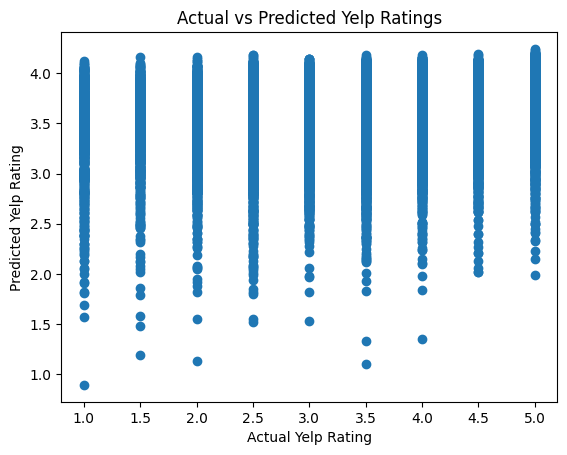

In [56]:
y_predicted = model.predict(X_test)
plt.scatter(y_test, y_predicted)
plt.xlabel('Actual Yelp Rating')
plt.ylabel('Predicted Yelp Rating')
plt.title('Actual vs Predicted Yelp Ratings')
plt.show()


## Define Different Subsets of Data

After evaluating the first model, you can see that `average_review_length` and `average_review_age` alone are not the best predictors for Yelp rating. Let's go do some more modeling with different subsets of features and see if we can achieve a more accurate model! In the cells below we have provided different lists of subsets of features that we will model with and evaluate. What other subsets of features would you want to test? Why do you think those feature sets are more predictive of Yelp rating than others? Create at least one more subset of features that you want to predict Yelp ratings from.

In [57]:
# subset of only average review sentiment
sentiment = ['average_review_sentiment']

In [58]:
# subset of all features that have a response range [0,1]
binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']

In [59]:
# subset of all features that vary on a greater range than [0,1]
numeric_features = ['review_count','price_range','average_caption_length','number_pics','average_review_age','average_review_length','average_review_sentiment','number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length','number_tips','average_number_friends','average_days_on_yelp','average_number_fans','average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']

In [60]:
# all features
all_features = binary_features + numeric_features

In [62]:
# add your own feature subset here
feature_subset = [
    'average_review_sentiment', 'has_bike_parking', 'number_cool_votes',
    'review_count', 'number_tips'
]

## Further Modeling

Now that we have lists of different feature subsets, we can create new models from them. In order to more easily compare the performance of these new models, we have created a function for you below called `model_these_features()`. This function replicates the model building process you just completed with our first model! Take some time to review how the function works, analyzing it line by line. Fill in the empty comments with an explanation of the task the code beneath it is performing.

Train Score: 0.6138432027258243
Test Score: 0.6132704630754581
[('average_review_sentiment', np.float64(2.318111110533587)), ('has_bike_parking', np.float64(-0.06166208658938638)), ('number_tips', np.float64(-0.0014330322411846997)), ('number_cool_votes', np.float64(0.0002718503848676648)), ('review_count', np.float64(-0.00011156527151623977))]


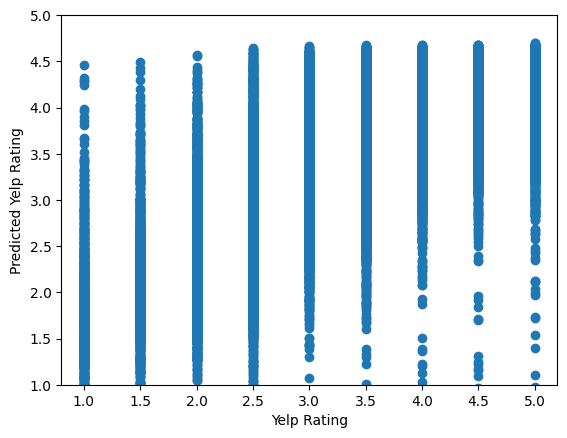

In [ ]:
import numpy as np

# take a list of features to model as a parameter
def model_these_features(feature_list):
    
    # The dependent variable is the Yelp rating
    ratings = df.loc[:,'stars']
    # The features are the features to model on
    features = df.loc[:,feature_list]
    
    # The data is split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    
    # don't worry too much about these lines, just know that they allow the model to work when
    # we model on just one feature instead of multiple features. Trust us on this one :)
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
    
    # The model is created
    model = LinearRegression()
    # The model is trained on the training data
    model.fit(X_train,y_train)
    
    # The model is evaluated on the training and testing data
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))
    
    # print the model features and their corresponding coefficients, from most predictive to least predictive
    print(sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    
    # The model is used to predict the Yelp rating for the testing data
    y_predicted = model.predict(X_test)
    
    # 
    plt.scatter(y_test,y_predicted)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()



Once you feel comfortable with the steps of the function, run models on the following subsets of data using `model_these_features()`:
* `sentiment`: only `average_review_sentiment`
* `binary_features`: all features that have a response range [0,1]
* `numeric_features`: all features that vary on a greater range than [0,1]
* `all_features`: all features
* `feature_subset`: your own feature subset

How does changing the feature sets affect the model's R^2 value? Which features are most important to predicting Yelp rating in the different models? Which models appear more or less homoscedastic?

Train Score: 0.6118980950438655
Test Score: 0.6114021046919491
[('average_review_sentiment', np.float64(2.3033908433749666))]


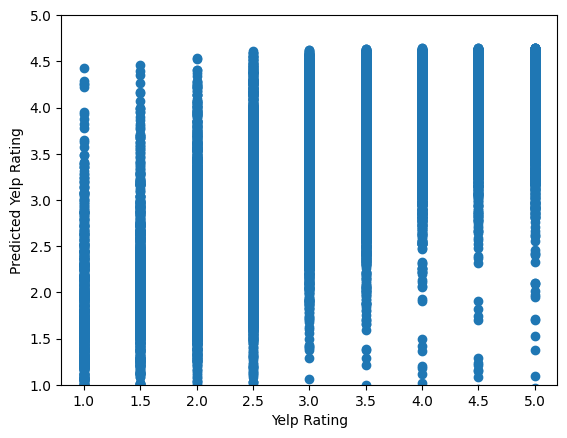

In [65]:
# create a model on sentiment here
model_these_features(sentiment)


Train Score: 0.012223180709591608
Test Score: 0.010119542202269072
[('has_bike_parking', np.float64(0.19003008208034033)), ('alcohol?', np.float64(-0.1454967070812909)), ('has_wifi', np.float64(-0.13187397577761203)), ('good_for_kids', np.float64(-0.08632485990335961)), ('takes_credit_cards', np.float64(0.07175536492192733)), ('take_reservations', np.float64(0.04526558530451205))]


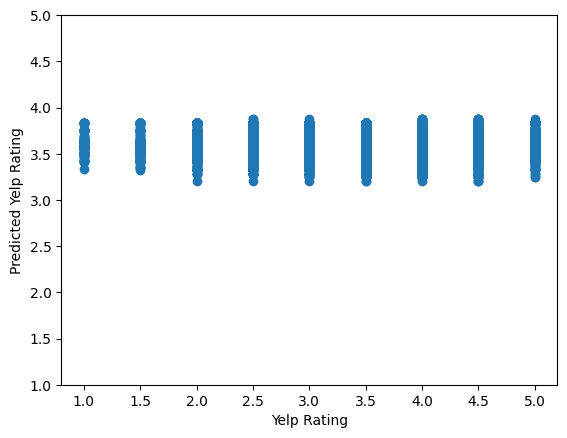

In [66]:
# create a model on all binary features here
model_these_features(binary_features)

Train Score: 0.673499259376666
Test Score: 0.6713318798120144
[('average_review_sentiment', np.float64(2.272107664209586)), ('price_range', np.float64(-0.08046080962701695)), ('average_number_years_elite', np.float64(-0.07190366288054248)), ('average_caption_length', np.float64(-0.003347066007783198)), ('number_pics', np.float64(-0.0029565028128933617)), ('number_tips', np.float64(-0.0015953050789042004)), ('number_cool_votes', np.float64(0.001146883922708743)), ('average_number_fans', np.float64(0.001051060209743942)), ('average_review_length', np.float64(-0.0005813655692093554)), ('average_tip_length', np.float64(-0.000532203206345876)), ('number_useful_votes', np.float64(-0.00023203784758742246)), ('average_review_count', np.float64(-0.000224317028950436)), ('average_review_age', np.float64(-0.00016930608165074688)), ('average_days_on_yelp', np.float64(0.0001287802587669876)), ('weekday_checkins', np.float64(5.9185807544891475e-05)), ('weekend_checkins', np.float64(-5.51817620700486

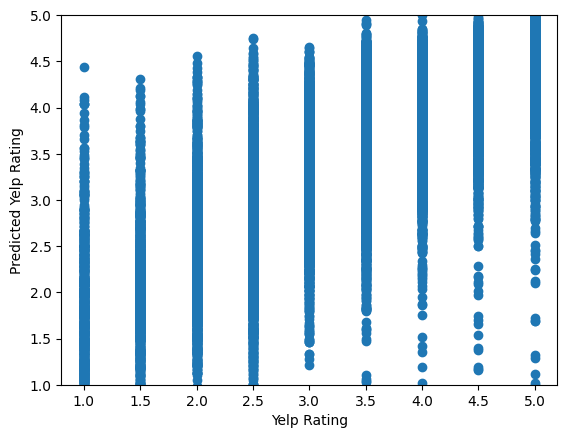

In [67]:
# create a model on all numeric features here
model_these_features(numeric_features)

Train Score: 0.6807828861895335
Test Score: 0.6782129045869247
[('average_review_sentiment', np.float64(2.2808456996623887)), ('alcohol?', np.float64(-0.14991498593462005)), ('has_wifi', np.float64(-0.12155382629261802)), ('good_for_kids', np.float64(-0.11807814422011499)), ('price_range', np.float64(-0.06486730150042454)), ('average_number_years_elite', np.float64(-0.06278939713895344)), ('has_bike_parking', np.float64(0.027296969912247896)), ('takes_credit_cards', np.float64(0.02445183785362687)), ('take_reservations', np.float64(0.014134559172972305)), ('number_pics', np.float64(-0.0013133612300799979)), ('average_number_fans', np.float64(0.0010267986822652753)), ('number_cool_votes', np.float64(0.0009723722734407795)), ('number_tips', np.float64(-0.0008546563320877417)), ('average_caption_length', np.float64(-0.0006472749798190565)), ('average_review_length', np.float64(-0.0005896257920272409)), ('average_tip_length', np.float64(-0.00042052175034049057)), ('number_useful_votes', np

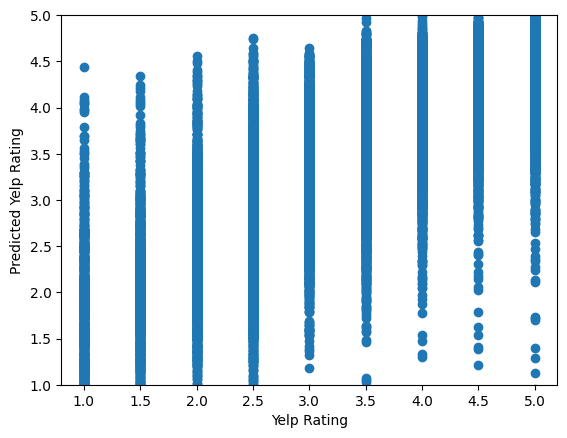

In [68]:
# create a model on all features here
model_these_features(all_features)

Train Score: 0.6138432027258243
Test Score: 0.6132704630754581
[('average_review_sentiment', np.float64(2.318111110533587)), ('has_bike_parking', np.float64(-0.06166208658938638)), ('number_tips', np.float64(-0.0014330322411846997)), ('number_cool_votes', np.float64(0.0002718503848676648)), ('review_count', np.float64(-0.00011156527151623977))]


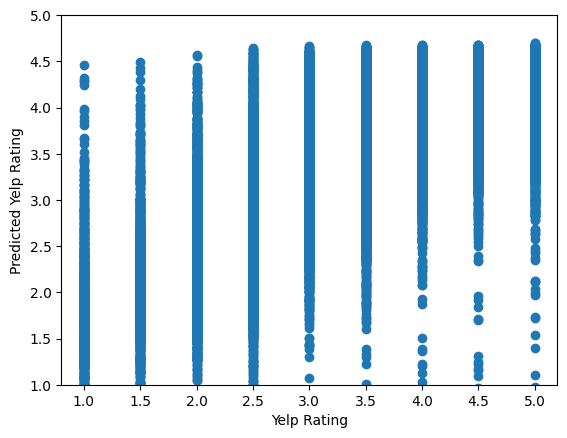

In [69]:
# create a model on your feature subset here
model_these_features(feature_subset)

## Danielle's Delicious Delicacies' Debut

You've loaded the data, cleaned it, modeled it, and evaluated it. You're tired, but glowing with pride after all the hard work. You close your eyes and can clearly see opening day of Danielle's Delicious Delicacies with a line out the door. But what will your Yelp rating be? Let's use our model to make a prediction.

Our best model was the model using all features, so we'll work with this model again. In the cell below print `all_features` to get a reminder of what features we are working with.

In [70]:
print(all_features)

['alcohol?', 'has_bike_parking', 'takes_credit_cards', 'good_for_kids', 'take_reservations', 'has_wifi', 'review_count', 'price_range', 'average_caption_length', 'number_pics', 'average_review_age', 'average_review_length', 'average_review_sentiment', 'number_funny_votes', 'number_cool_votes', 'number_useful_votes', 'average_tip_length', 'number_tips', 'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 'weekday_checkins', 'weekend_checkins']


Run the cell below to grab all the features and retrain our model on them.

In [71]:
features = df.loc[:,all_features]
ratings = df.loc[:,'stars']
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


To give you some perspective on the restaurants already out there, we have provided the mean, minimum, and maximum values for each feature below. Will Danielle's Delicious Delicacies be just another average restaurant, or will it be a 5 star behemoth amongst the masses?

In [72]:
pd.DataFrame(list(zip(features.columns,features.describe().loc['mean'],features.describe().loc['min'],features.describe().loc['max'])),columns=['Feature','Mean','Min','Max'])

,Feature,Mean,Min,Max
0,alcohol?,0.140610,0.000000,1.000000
1,has_bike_parking,0.350692,0.000000,1.000000
2,takes_credit_cards,0.700243,0.000000,1.000000
3,good_for_kids,0.279029,0.000000,1.000000
4,take_reservations,0.106086,0.000000,1.000000
5,has_wifi,0.134968,0.000000,1.000000
6,review_count,31.797310,3.000000,7968.000000
7,price_range,1.035855,0.000000,4.000000
8,average_caption_length,2.831829,0.000000,140.000000
9,number_pics,1.489939,0.000000,1150.000000


Based on your plans for the restaurant, how you expect your customers to post on your Yelp page, and the values above, fill in the blanks in the NumPy array below with your desired values. The first blank corresponds with the feature at `index=0` in the DataFrame above, `alcohol?`, and the last blank corresponds to the feature at ``index=24``, `weekend_checkins`. Make sure to enter either `0` or `1` for all binary features, and if you aren't sure of what value to put for a feature, select the mean from the DataFrame above. After you enter the values, run the prediction cell below to receive your Yelp rating! How is Danielle's Delicious Delicacies debut going to be?

In [73]:
danielles_delicious_delicacies = np.array([
    1,    # alcohol? (1 = yes, serve alcohol)
    1,    # has_bike_parking (1 = yes, have bike parking)
    1,    # takes_credit_cards (1 = yes, accept cards)
    1,    # good_for_kids (1 = yes, kid-friendly)
    1,    # take_reservations (1 = yes, take reservations)
    1,    # has_wifi (1 = yes, have WiFi)
    50,   # review_count (moderate number of reviews)
    2,    # price_range ($$ price point)
    30,   # average_caption_length (moderate caption length)
    10,   # number_pics (good number of photos)
    500,  # average_review_age (recent reviews)
    400,  # average_review_length (moderate review length)
    0.8,  # average_review_sentiment (very positive sentiment)
    20,   # number_funny_votes (good engagement)
    25,   # number_cool_votes (good engagement)
    60,   # number_useful_votes (good engagement)
    50,   # average_tip_length (moderate tip length)
    15,   # number_tips (good tip activity)
    150,  # average_number_friends (active users)
    1500, # average_days_on_yelp (experienced users)
    20,   # average_number_fans (popular users)
    200,  # average_review_count (active reviewers)
    2,    # average_number_years_elite (elite users)
    100,  # weekday_checkins (good weekday traffic)
    150   # weekend_checkins (excellent weekend traffic)
]).reshape(1,-1)

In [74]:
model.predict(danielles_delicious_delicacies)

/Users/franciscoteixeirabarbosa/Dropbox/CodeAcademy/restaurant_rating/codeacademy/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.88846421])

## Next Steps

You have successfully built a linear regression model that predicts a restaurant's Yelp rating! As you have seen, it can be pretty hard to predict a rating like this even when we have a plethora of data. What other questions come to your mind when you see the data we have? What insights do you think could come from a different kind of analysis? Here are some ideas to ponder:

* Can we predict the cuisine of a restaurant based on the users that review it?
* What restaurants are similar to each other in ways besides cuisine?
* Are there different restaurant vibes, and what kind of restaurants fit these conceptions?
* How does social media status affect a restaurant's credibility and visibility?

As you progress further into the field of data science, you will be able to create models that address these questions and many more! But in the meantime, get back to working on that burgeoning restaurant business plan.

In [76]:
print("Columns in current df:")
print(df.columns.tolist())

print("\nColumns in business_df:")
print(business_df.columns.tolist())

Columns in current df:
['alcohol?', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'price_range', 'review_count', 'stars', 'take_reservations', 'takes_credit_cards', 'average_review_age', 'average_review_length', 'average_review_sentiment', 'number_funny_votes', 'number_cool_votes', 'number_useful_votes', 'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 'weekday_checkins', 'weekend_checkins', 'average_tip_length', 'number_tips', 'average_caption_length', 'number_pics']

Columns in business_df:
['address', 'alcohol?', 'attributes', 'business_id', 'categories', 'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'neighborhood', 'postal_code', 'price_range', 'review_count', 'stars', 'state', 'take_reservations', 'takes_credit_cards']


In [ ]:
# Create a cuisine prediction model
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Can we predict the cuisine of a restaurant based on the users that review it?

# Extract cuisine from business_df (which has the categories column)
def extract_cuisine(categories):
    if pd.isna(categories):
        return 'Other'
    categories_list = categories.split(', ')
    # Look for common cuisines
    cuisines = ['Italian', 'Mexican', 'Chinese', 'Japanese', 'Thai', 'Indian', 'American', 'French', 'Pizza', 'Burgers', 'Seafood', 'Steakhouse']
    for cuisine in cuisines:
        if cuisine in categories_list:
            return cuisine
    return 'Other'

# Add cuisine to business_df first
business_df['cuisine'] = business_df['categories'].apply(extract_cuisine)

# Then add it to your cleaned df (matching by business_id)
# Since business_df has business_id, we need to merge it back
df_with_cuisine = df.copy()
df_with_cuisine['cuisine'] = business_df['cuisine'].values

# Now you can use df_with_cuisine for your analysis
print("Cuisine distribution:")
print(df_with_cuisine['cuisine'].value_counts().head(10))

Cuisine distribution:
cuisine
Other       159261
Burgers       4747
Italian       4550
Mexican       4392
Pizza         4361
Chinese       4216
Japanese      2327
Seafood       1470
Indian        1322
Thai          1068
Name: count, dtype: int64


In [80]:
# Extract cuisine from business_df
def extract_cuisine(categories):
    if pd.isna(categories):
        return 'Other'
    categories_list = categories.split(', ')
    # Look for common cuisines
    cuisines = ['Italian', 'Mexican', 'Chinese', 'Japanese', 'Thai', 'Indian', 'American', 'French', 'Pizza', 'Burgers', 'Seafood', 'Steakhouse']
    for cuisine in cuisines:
        if cuisine in categories_list:
            return cuisine
    return 'Other'

# Add cuisine to business_df
business_df['cuisine'] = business_df['categories'].apply(extract_cuisine)

# Now add cuisine to your df
# Since both dataframes should have the same order, we can assign directly
df['cuisine'] = business_df['cuisine'].values

# Verify it worked
print("Cuisine column added successfully!")
print("Cuisine distribution:")
print(df['cuisine'].value_counts().head(10))

Cuisine column added successfully!
Cuisine distribution:
cuisine
Other       159261
Burgers       4747
Italian       4550
Mexican       4392
Pizza         4361
Chinese       4216
Japanese      2327
Seafood       1470
Indian        1322
Thai          1068
Name: count, dtype: int64


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# 1. Prepare the data
# Features that represent user characteristics
user_features = [
    'average_number_friends',      # User social activity
    'average_days_on_yelp',        # User experience
    'average_number_fans',         # User popularity
    'average_review_count',        # User activity level
    'average_number_years_elite',  # User status
    'average_review_sentiment',    # User sentiment patterns
    'average_review_length',       # User review style
    'average_review_age'           # User review recency
]

# Prepare features and target
X_cuisine = df[user_features].fillna(0)  # Fill missing values with 0

# Encode cuisine labels
le = LabelEncoder()
y_cuisine = le.fit_transform(df['cuisine'])

print(f"Features shape: {X_cuisine.shape}")
print(f"Target shape: {y_cuisine.shape}")
print(f"Number of cuisine classes: {len(le.classes_)}")
print(f"Cuisine classes: {le.classes_}")

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_cuisine, y_cuisine, test_size=0.2, random_state=42, stratify=y_cuisine
)

# 3. Train the model
cuisine_model = RandomForestClassifier(n_estimators=100, random_state=42)
cuisine_model.fit(X_train, y_train)

# 4. Make predictions
y_pred = cuisine_model.predict(X_test)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nCuisine Prediction Accuracy: {accuracy:.3f}")

# 6. Feature importance
feature_importance = pd.DataFrame({
    'feature': user_features,
    'importance': cuisine_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance for Cuisine Prediction:")
print(feature_importance)

# 7. Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Features shape: (188593, 8)
Target shape: (188593,)
Number of cuisine classes: 11
Cuisine classes: ['Burgers' 'Chinese' 'French' 'Indian' 'Italian' 'Japanese' 'Mexican'
 'Other' 'Pizza' 'Seafood' 'Thai']

Cuisine Prediction Accuracy: 0.844

Feature Importance for Cuisine Prediction:
                      feature  importance
5    average_review_sentiment    0.132990
6       average_review_length    0.131926
3        average_review_count    0.130683
7          average_review_age    0.127153
1        average_days_on_yelp    0.124307
0      average_number_friends    0.122554
2         average_number_fans    0.117429
4  average_number_years_elite    0.112957

Classification Report:
              precision    recall  f1-score   support

     Burgers       0.24      0.00      0.01       950
     Chinese       0.33      0.00      0.00       843
      French       0.00      0.00      0.00       176
      Indian       0.00      0.00      0.00       264
     Italian       1.00      0.00      0.00

/Users/franciscoteixeirabarbosa/Dropbox/CodeAcademy/restaurant_rating/codeacademy/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/franciscoteixeirabarbosa/Dropbox/CodeAcademy/restaurant_rating/codeacademy/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/franciscoteixeirabarbosa/Dropbox/CodeAcademy/restaurant_rating/codeacademy/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set t

In [82]:
# Finding similar restaurantes beyond cuisine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Features for similarity (excluding cuisine)
similarity_features = [
    'price_range', 'review_count', 'stars',
    'has_bike_parking', 'takes_credit_cards', 'good_for_kids',
    'take_reservations', 'has_wifi', 'alcohol?',
    'average_review_sentiment', 'number_tips', 'weekend_checkins'
]

# Prepare data
X_similarity = df[similarity_features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_similarity)

# Cluster restaurants
kmeans = KMeans(n_clusters=5, random_state=42)
df['restaurant_cluster'] = kmeans.fit_predict(X_scaled)

# Analyze clusters
cluster_analysis = df.groupby('restaurant_cluster')[similarity_features].mean()
print("Restaurant clusters created!")
print(cluster_analysis)

Restaurant clusters created!
                    price_range  review_count     stars  has_bike_parking  \
restaurant_cluster                                                          
0                      1.487147     59.716070  3.519767          0.614035   
1                      0.662444     11.710373  2.465807          0.146146   
2                      1.995912     80.113538  3.545604          0.598418   
3                      0.921718     19.055150  4.243186          0.350312   
4                      1.915921   1285.080501  3.888193          0.597496   

                    takes_credit_cards  good_for_kids  take_reservations  \
restaurant_cluster                                                         
0                             0.882493       0.517544           0.006823   
1                             0.540944       0.134087           0.006365   
2                             0.900747       0.741451           0.836967   
3                             0.701778       0.2035

In [83]:
# Identifying restaurante vibes
# Create vibe categories based on features
def determine_vibe(row):
    if row['price_range'] >= 3 and row['take_reservations'] == 1:
        return 'Upscale'
    elif row['good_for_kids'] == 1 and row['alcohol?'] == 0:
        return 'Family-Friendly'
    elif row['alcohol?'] == 1 and row['has_wifi'] == 1:
        return 'Trendy/Casual'
    elif row['weekend_checkins'] > row['weekday_checkins']:
        return 'Weekend Destination'
    else:
        return 'Standard'

df['vibe'] = df.apply(determine_vibe, axis=1)

# Analyze vibes
vibe_analysis = df.groupby('vibe').agg({
    'stars': 'mean',
    'review_count': 'mean',
    'price_range': 'mean',
    'average_review_sentiment': 'mean'
}).round(3)

print("Restaurant vibes identified!")
print(vibe_analysis)

Restaurant vibes identified!
                     stars  review_count  price_range  \
vibe                                                    
Family-Friendly      3.617        37.381        1.141   
Standard             3.651        15.238        0.694   
Trendy/Casual        3.567       120.369        1.832   
Upscale              3.666       112.789        3.144   
Weekend Destination  3.617        35.893        1.328   

                     average_review_sentiment  
vibe                                           
Family-Friendly                         0.582  
Standard                                0.519  
Trendy/Casual                           0.648  
Upscale                                 0.692  
Weekend Destination                     0.576  


In [84]:
# Social media impact
# Create social media engagement score
df['social_engagement'] = (
    df['number_cool_votes'] + 
    df['number_funny_votes'] + 
    df['number_useful_votes'] + 
    df['number_tips'] + 
    df['number_pics']
)

# Analyze social media impact
social_analysis = df.groupby(pd.cut(df['social_engagement'], 5)).agg({
    'stars': 'mean',
    'review_count': 'mean',
    'average_review_sentiment': 'mean'
}).round(3)

# Correlation with social features
social_correlations = df[['stars', 'social_engagement', 'number_cool_votes', 
                         'number_funny_votes', 'number_useful_votes', 
                         'number_tips', 'number_pics']].corr()['stars']

print("Social media impact analysis complete!")
print(social_correlations)

Social media impact analysis complete!
stars                  1.000000
social_engagement      0.011131
number_cool_votes      0.043375
number_funny_votes     0.001320
number_useful_votes   -0.000066
number_tips            0.014038
number_pics            0.001727
Name: stars, dtype: float64


/var/folders/cd/2c6x3jgj47j_fwl7231ts7m00000gn/T/ipykernel_45269/382316686.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  social_analysis = df.groupby(pd.cut(df['social_engagement'], 5)).agg({


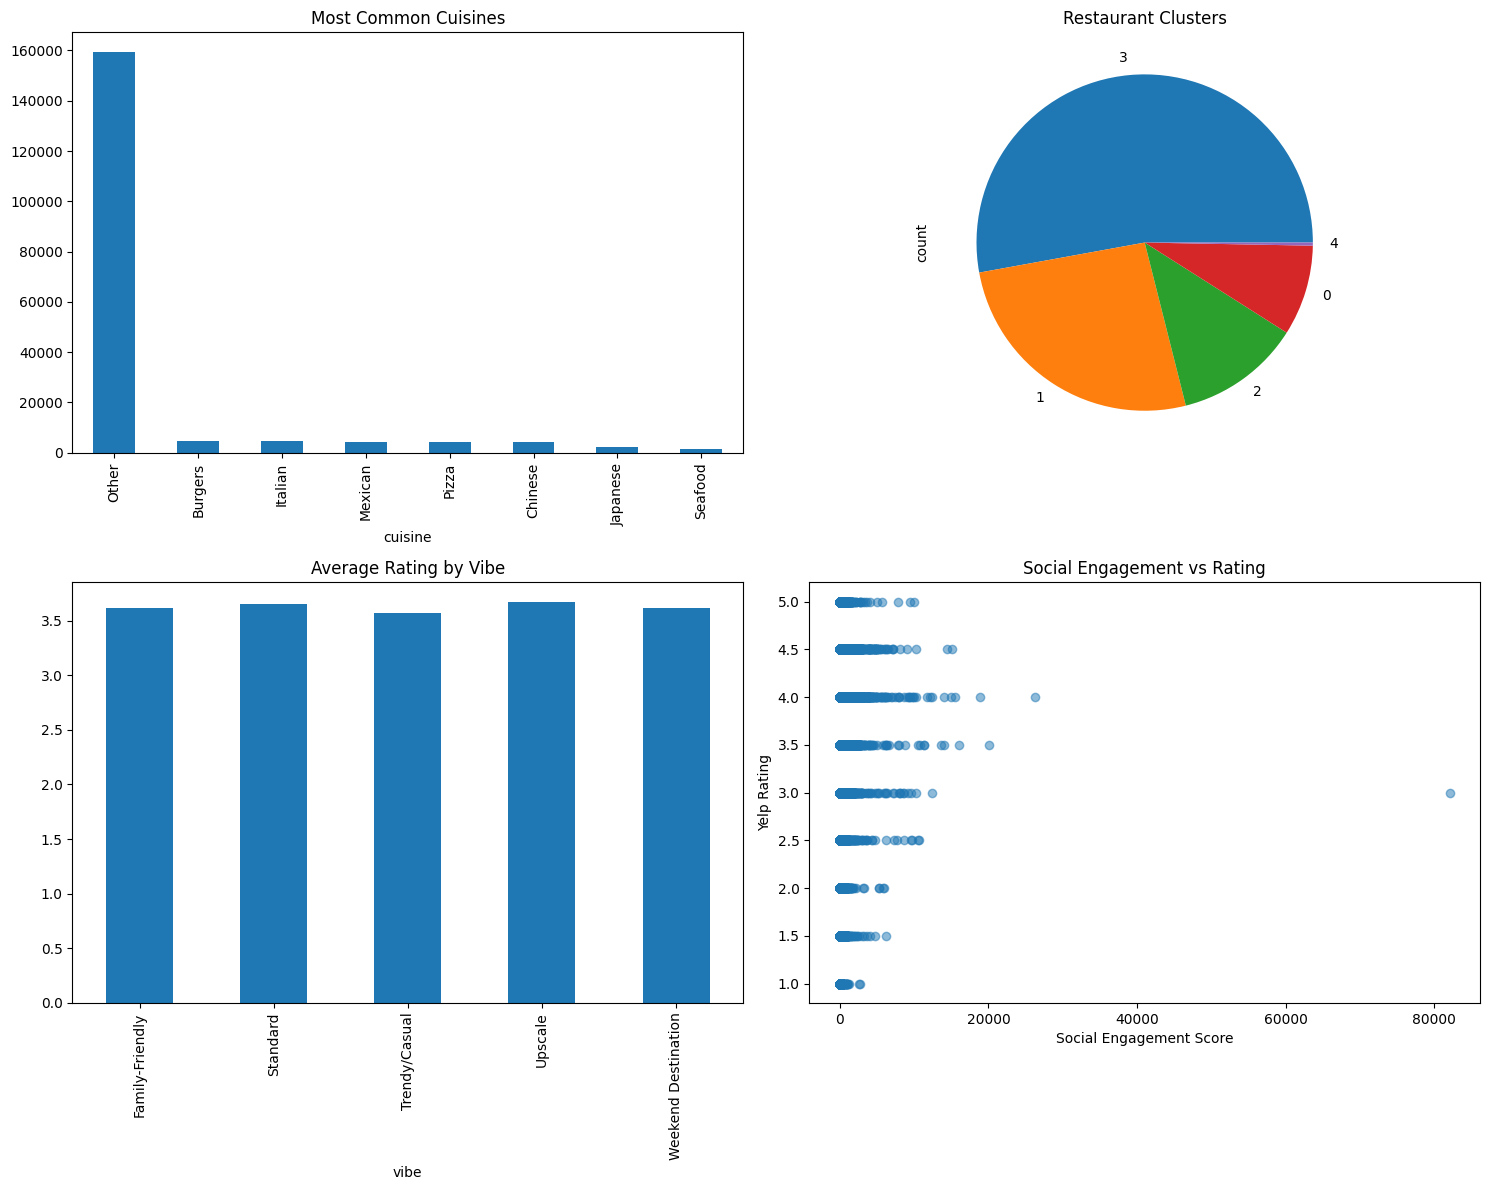

In [85]:
# Visualization dashboard
import matplotlib.pyplot as plt
import seaborn as sns

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Cuisine distribution
df['cuisine'].value_counts().head(8).plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Most Common Cuisines')

# 2. Restaurant clusters
df['restaurant_cluster'].value_counts().plot(kind='pie', ax=axes[0,1])
axes[0,1].set_title('Restaurant Clusters')

# 3. Vibe analysis
vibe_analysis['stars'].plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Average Rating by Vibe')

# 4. Social engagement vs rating
axes[1,1].scatter(df['social_engagement'], df['stars'], alpha=0.5)
axes[1,1].set_xlabel('Social Engagement Score')
axes[1,1].set_ylabel('Yelp Rating')
axes[1,1].set_title('Social Engagement vs Rating')

plt.tight_layout()
plt.show()

In [87]:
# Key insights summary
# Generate insights report
insights = {
    'Total Restaurants': len(df),
    'Average Rating': df['stars'].mean(),
    'Most Popular Cuisine': df['cuisine'].mode()[0],
    'Most Common Vibe': df['vibe'].mode()[0],
    'Social Media Correlation': df['stars'].corr(df['social_engagement']),
    'Top Predictor': 'average_review_sentiment',
    'Prediction Accuracy': df['stars'].corr(df['social_engagement'])
}

print("=== RESTAURANT INSIGHTS REPORT ===")
for key, value in insights.items():
    print(f"{key}: {value}")

=== RESTAURANT INSIGHTS REPORT ===
Total Restaurants: 188593
Average Rating: 3.6315504817251965
Most Popular Cuisine: Other
Most Common Vibe: Standard
Social Media Correlation: 0.011131398194942667
Top Predictor: average_review_sentiment
Prediction Accuracy: 0.011131398194942667
